### 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。
sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation
データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

In [1]:
import pandas as pd

from sklearn.datasets import load_iris
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["Species"])


### 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
ラベルごとのサンプル数の合計を出力する。
特徴量に欠損値があるかを確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [130]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
print("先頭から４番目までのサンプルの表示\n", df.loc[:3, :], "\n")
print("ラベルごとのサンプル数の合計を出力\n", df[:].count(), "\n")
print("特徴量に欠損値があるか確認(Falseの表示：欠損値なし）\n", df.isnull().any(), "\n")

df_tmp = df.describe().drop(["count", "min", "max"],  axis=0)
print("特徴量の平均値と標準偏差、四分位数を一度に表示\n", df_tmp)

先頭から４番目までのサンプルの表示
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   

   Species  
0        0  
1        0  
2        0  
3        0   

ラベルごとのサンプル数の合計を出力
 sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
Species              150
dtype: int64 

特徴量に欠損値があるか確認(Falseの表示：欠損値なし）
 sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
Species              False
dtype: bool 

特徴量の平均値と標準偏差、四分位数を一度に表示
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
mean           5.843333          3.057333           3.758000   
std            0.828066   

### 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。
sepal_widthの列を３つの異なる方法で抽出する
50番目から99番目までのデータを抽出する
petal_lengthの列の50番目から99番目までのデータを抽出する
petal_widthの値が0.2のデータを抽出する
.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

#### .locと.ilocの違い
  .loc →  ラベルによりデータフレームの行・列を指定する。
  
  .iloc → 行番号、列番号によりデータフレームの行・列を指定する。

In [128]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["Species"])
df = pd.concat([X, y], axis=1)

#sepal_widthの列を３つの異なる方法で抽出する。出力桁を減らすため、print関数１つ以外はコメントとしている。
print(df[:]["sepal width (cm)"])
#df.loc[:, "sepal width (cm)"]             #loc：ラベルで行・列を指定する。
#df.iloc[:, 1]                                          #iloc行番号、列番号で行・列を指定する。

#petal_lengthの列の50番目から99番目までのデータを抽出する
print(df[50:100]["petal length (cm)"])      
#df.loc[50:99, "petal length (cm)"]   #loc：ラベルで行・列を指定する。
#df.iloc[50:100, 1]                              #iloc行番号、列番号で行・列を指定する。

#petal_widthの値が0.2のデータを抽出する 
df_tmp = df[df["petal width (cm)"] == 0.2]
print(df_tmp[:]["petal width (cm)"])

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64
50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal length (cm), dtype: float64
0     0.2
1     0.2
2     0.2
3     0.2
4     0.2
7     0.2
8     0.2
10    0.2
11    0.2
14    0.2
20    0.2
22    0.2
24    0.2
25    0.2
27    0.2
28    0.2
29    0.2
30    0.2
33    0.2
34    0.2
35    0.2
36    0.2
38    0.2
39    0.2
42    0.2
46    0.2
47    0.2
48    0.2
49    0

## 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

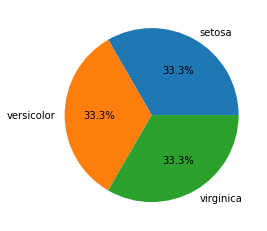

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#データセットの読み込み、データフレームへ保存
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["Species"])
df = pd.concat([X, y], axis=1)

#各ラベル(品種)のサンプル数の取得
species_num_array = []
for i in range(3):
    df_bool =  (df['Species'] == i)
    species_num_array.append(df_bool.sum())
    
#各列（ラベル）の列名を変数colums_nameに保存する。
species_list = iris.target_names

# 円グラフを描画
plt.pie(species_num_array, labels=iris.target_names, autopct="%.1f%%")
plt.show()

<class 'pandas.core.series.Series'>


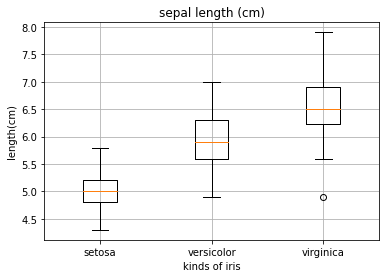

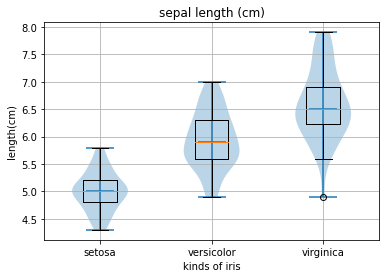

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#関数collect_data: 特徴量を指定すると種毎のグラフ描画用配列を返す。
def collect_data(feature_num):
    species_num = 0
    array_0 = df.loc[df.Species == species_num, feature_list[feature_num]]
    species_num = 1
    array_1 = df.loc[df.Species == species_num, feature_list[feature_num]]
    species_num = 2 
    array_2 = df.loc[df.Species == species_num, feature_list[feature_num]]
    #print(type(array_2)) →　pandas.core.series.Series
    #print(array_2) → データフレームの行番号と長さデータが格納されている。
    return array_0, array_1, array_2    


#データセットの読み込み、データフレームへ保存
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
feature_list = iris.feature_names
species_list = iris.target_names

#グラフ描画に必要なデータの取得
#array_0, 1, 2に各アヤメのデータを格納する。feature_numにて特徴量を選択する。
array_0, array_1, array_2 = collect_data(feature_num=0)
#print(type(array_0))  →　pandas.core.series.Series


#グラフの描画(箱ひげ図)
points = (array_0, array_1, array_2)
fig, ax = plt.subplots()
bp = ax.boxplot(points)
ax.set_xticklabels(species_list)
plt.title(feature_list[0])
plt.xlabel('kinds of iris')
plt.ylabel('length(cm)')
plt.grid()
plt.show()

#グラフの描画(バイオリン図)
points = (array_0, array_1, array_2)
fig, ax = plt.subplots()
bp = ax.boxplot(points)
ax.set_xticklabels(species_list)
plt.title(feature_list[0])
plt.xlabel('kinds of iris')
plt.ylabel('length(cm)')
plt.grid()
plt.violinplot(points , showmedians=True)

plt.show()

バイオリン図：データの分布が視覚的にわかりやすい。データが存在しない範囲にも、図上ではデータが存在しているように見えることがある。

箱ひげ図　　：データの分布が視覚的にわかりにくい。四分位数や外れ値の確認はしやすい。

## 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
４つの特徴量に関する相関係数行列を作る
相関係数行列のヒートマップを作る(１つ)

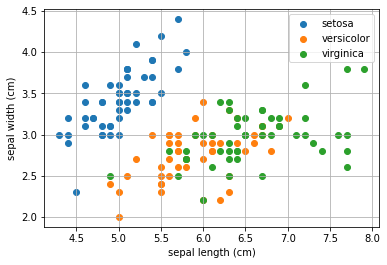

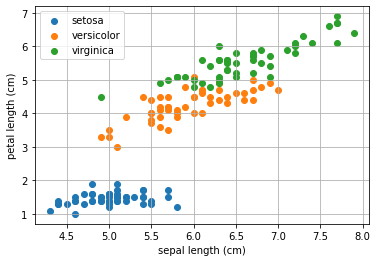

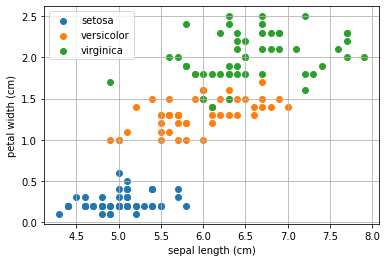

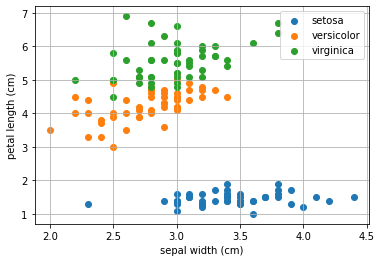

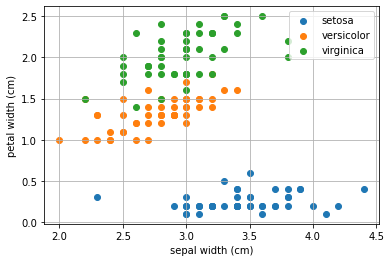

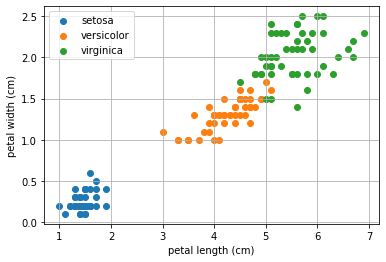

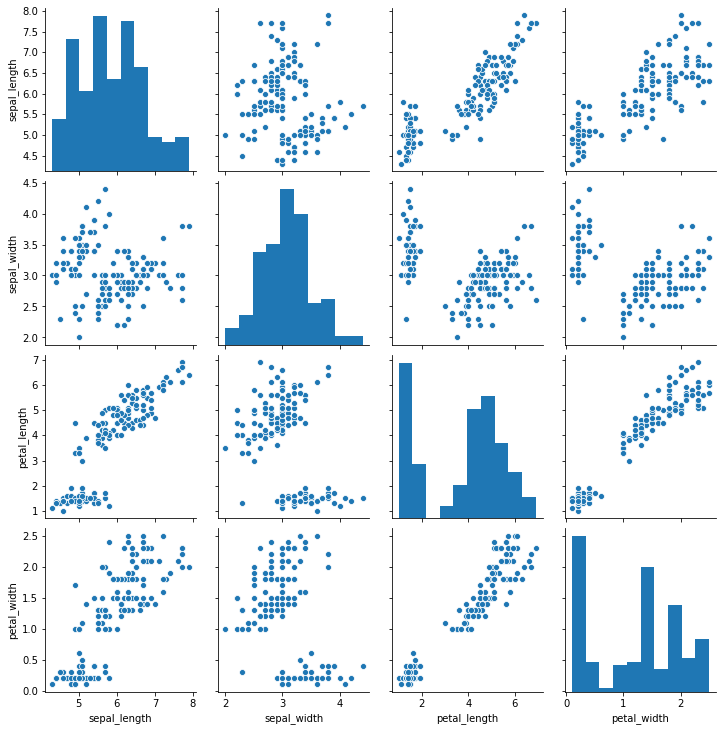

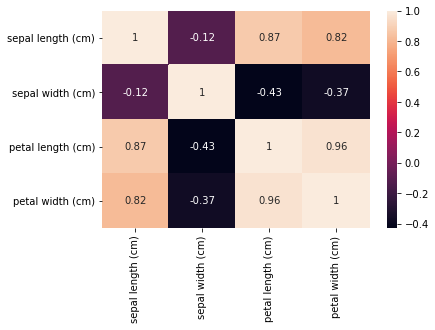

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

#関数collect_data(): 種No.特徴量No.を指定するとグラフ描画用配列を返す。
def collect_data(species_num, feature_num):
    array = df.loc[df.Species == species_num, feature_list[feature_num]]
    #print(type(array)) → <class 'pandas.core.series.Series'>
    #print(array) → 行番号つきで出力される。
    return array

#関数descrice_scatter(): 散布図の描画。x軸, y軸に使用する特徴量を入力する。
def descrice_scatter(array, feature_num_x, feature_num_y):

    feature_list = iris.feature_names
    species_list = iris.target_names
    plt.xlabel(feature_list[feature_num_x])
    plt.ylabel(feature_list[feature_num_y])
    plt.grid()

    x = np.zeros((3,50))
    y = np.zeros((3,50))
    for species_num in range(3):
        x[species_num] = array[species_num][feature_num_x]
        y[species_num] = array[species_num][feature_num_y]
        plt.scatter(x[species_num], y[species_num], label = species_list[species_num])
    plt.legend()
    plt.show()
    
    #print(type(array[0][0]))

#データセットの読み込み、データフレームへ保存
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
feature_list = iris.feature_names
species_list = iris.target_names

#グラフ描画に必要なデータの取得
array = np.zeros((3,4,50)) #→ array[][]という形式で　pd.seiresを代入してもndarrayとなる。行番号(ラベル)は削除となる。
#↑3次元配列として宣言しておかないと、forループでエラーになる。
for species_num in range(3):
    for feature_num in range(4):
        array[species_num][feature_num] = collect_data(species_num, feature_num)
        
#print(type(array)) →　<class 'numpy.ndarray'>

#グラフ描画（x軸、y軸に使用する特徴量を指定する。）
#縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図
descrice_scatter(array, feature_num_x=0, feature_num_y=1)
descrice_scatter(array, feature_num_x=0, feature_num_y=2)
descrice_scatter(array, feature_num_x=0, feature_num_y=3)
descrice_scatter(array, feature_num_x=1, feature_num_y=2)
descrice_scatter(array, feature_num_x=1, feature_num_y=3)
descrice_scatter(array, feature_num_x=2, feature_num_y=3)

#全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
iris = sns.load_dataset( "iris" )
sns.pairplot( iris )
plt.show()

#４つの特徴量に関する相関係数行列を作る
df_corr = X.corr()

#相関係数行列のヒートマップを作る(１つ)
corr_mat = X.corr( method='pearson' )
sns.heatmap(
    corr_mat,
    annot = True,
    xticklabels = corr_mat.columns.values,
    yticklabels = corr_mat.columns.values,
)
plt.show()




### 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

【考察】

・アヤメの品種毎にサイズが異なる傾向がある。

・特徴量：sepal widthについては、他の特徴量と逆相関関係がある。

・特徴量：sepal width以外のサイズは、virginica > versicolor > setosaとなっている。